In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import smtplib as s
import os
from datetime import datetime
from email.mime.text import MIMEText

In [2]:
df = pd.read_excel("C:/Users/MSI/Documents/My_doc/Stage/Projet_suivi_contrats/test_contrat_VF.xlsx")
df.head()

c:\Users\MSI\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():
c:\Users\MSI\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


,Indexe,Nom,Contact du client,Numéro Contrat,Type de client,Date de début,Date de fin,Status,Offres,Departement,Commune,Agent SBIN(Responsable contrat)
0,1,AlphaTech,22940902107,SBIN202300001,Entreprise,01/01/2023,31/12/2023,EXPIRE,FTTH,Atlantique,Natitingou,Ange Yétonde
1,2,BetaSolutions,22940655177,SBIN202300002,Entreprise,16/01/2023,15/01/2024,EXPIRE,FTTH,Mono,Natitingou,Benoit Agossou
2,3,Ministère de l'Intérieur,22940109349,SBIN202300003,ETAT,31/01/2023,30/01/2024,EXPIRE,FTTH,Donga,Savalou,Lucien Glele
3,4,Ministère des Affaires Étrangères,22940439877,SBIN202300004,ETAT,15/02/2023,14/02/2024,EXPIRE,Celtiis Business RNIS,Atlantique,Abomey-Calavi,Ange Yétonde
4,5,Ministère de la Défense,22940249298,SBIN202300005,ETAT,02/03/2023,29/02/2024,EXPIRE,FTTH,Ouémé,Porto-Novo,Victoire Azon


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Indexe                           100 non-null    int64 
 1   Nom                              100 non-null    object
 2   Contact du client                100 non-null    int64 
 3   Numéro Contrat                   100 non-null    object
 4   Type de client                   100 non-null    object
 5   Date de début                    100 non-null    object
 6   Date de fin                      100 non-null    object
 7   Status                           100 non-null    object
 8   Offres                           100 non-null    object
 9   Departement                      100 non-null    object
 10  Commune                          100 non-null    object
 11  Agent SBIN(Responsable contrat)  100 non-null    object
dtypes: int64(2), object(10)
memory usage:

Tri par mois et par année

In [4]:
#conversion des dates dans un format permettant d'extraire le mois et l'année
df['Date de début'] = pd.to_datetime(df['Date de début'], format="%d/%m/%Y", errors='coerce')
df['Date de fin'] = pd.to_datetime(df['Date de fin'], format="%d/%m/%Y", errors='coerce')

#tri par mois
def tri_par_mois(mois):
    plage = df[(df['Date de fin'].dt.month == mois)]
    return plage

#tri par année
def tri_par_annee(annee):
    plage = df[(df['Date de fin'].dt.year == annee)]
    return plage

#tri par mois annee
def tri_par_mois_annee(mois,annee):
    plage = df[(df['Date de fin'].dt.year <= annee) & (df['Date de fin'].dt.month <= mois)]
    return plage

r = tri_par_mois(2)
r


,Indexe,Nom,Contact du client,Numéro Contrat,Type de client,Date de début,Date de fin,Status,Offres,Departement,Commune,Agent SBIN(Responsable contrat)
3,4,Ministère des Affaires Étrangères,22940439877,SBIN202300004,ETAT,2023-02-15,2024-02-14,EXPIRE,Celtiis Business RNIS,Atlantique,Abomey-Calavi,Ange Yétonde
4,5,Ministère de la Défense,22940249298,SBIN202300005,ETAT,2023-03-02,2024-02-29,EXPIRE,FTTH,Ouémé,Porto-Novo,Victoire Azon
27,28,DynamoGlobal,22940490143,SBIN202300028,Entreprise,2024-02-10,2025-02-08,ACTIF,FTTH,Collines,Dassa-Zoumé,Victoire Azon
28,29,EdgeComms,22940758047,SBIN202300029,Entreprise,2024-02-25,2025-02-23,ACTIF,SERVEUR VIRTUEL,Ouémé,Bohicon,Eric Sodji
51,52,CoreSolutions,22940183781,SBIN202300052,Entreprise,2025-02-04,2026-02-03,INACTIF,FTTH,Zou,Bohicon,Eric Sodji
52,53,DataVista,22940895209,SBIN202300053,Entreprise,2025-02-19,2026-02-18,INACTIF,FTTH,Kouffo,Cotonou,Chantal Bio
76,77,BrightPathTech,22940882627,SBIN202300077,Entreprise,2026-02-14,2027-02-13,INACTIF,SERVEUR VIRTUEL,Borgou,Savalou,Victoire Azon
77,78,CloudNineSolutions,22940607631,SBIN202300078,Entreprise,2026-03-01,2027-02-28,INACTIF,FTTH,Ouémé,Dassa-Zoumé,Fanny Aholou


Tri par contrat

In [5]:
def tri_par_contrat(contrat):
    plage = df[df['Offres'] == contrat]
    return plage


Recherche

In [6]:
#recherche par nom
def recherhce_par_nom(nom):
    return df[df['Nom'] == nom]

#recherche par numéro contrat
def recherhce_par_num(num):
    return df[df['Numéro Contrat'] == num]


Statistiques

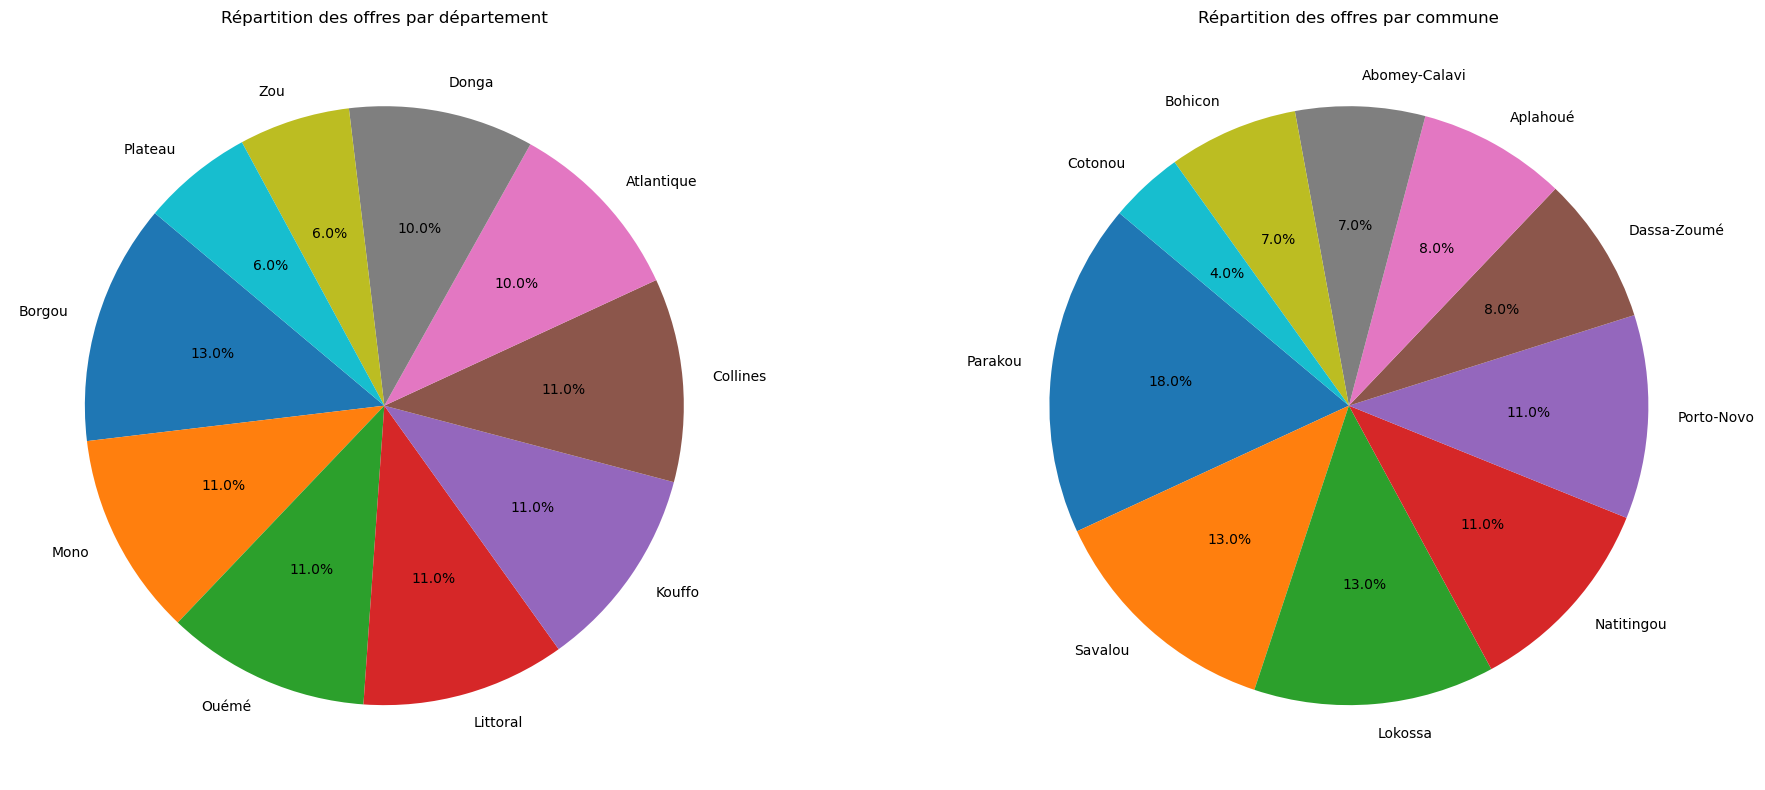

In [7]:
#zones géographiques bénéficiant de la meilleure couverture pour les offres proposées
frequence_departement = df['Departement'].value_counts()
frequence_commune = df['Commune'].value_counts()

#diagramme circulaire pour observer la couvertures des offres
fig, axes = plt.subplots(1,2, figsize=(20,8))
axes[0].pie(frequence_departement, labels=frequence_departement.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Répartition des offres par département')
axes[1].pie(frequence_commune, labels=frequence_commune.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Répartition des offres par commune')

plt.tight_layout()
plt.show()

In [8]:
#progression des contrats dans les différentes localités 

#conversion de la colonne date de début en datetime pour pouvoir extraire l'tri_par_annee
df['Date de début'] = pd.to_datetime(df['Date de début'])
df['Annee'] = df['Date de début'].dt.year

def progression_contrats(localite):
    souscriptions = df.groupby([localite, 'Annee']).size().unstack(fill_value=0)
    
    fig, axes = plt.subplots(len(souscriptions.index),2, figsize=(10,6*len(souscriptions.index)))
    axes = axes.flatten()
    for i, localite in enumerate(souscriptions.index):
        axes[i].plot(souscriptions.columns, souscriptions.loc[localite], marker='o', label=localite)
        axes[i].set_xlabel('Année')
        axes[i].set_ylabel('Nombre de souscriptions')
        axes[i].set_title(f'Progression des souscriptions pour {localite}')
        axes[i].legend(title=localite)
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()
    


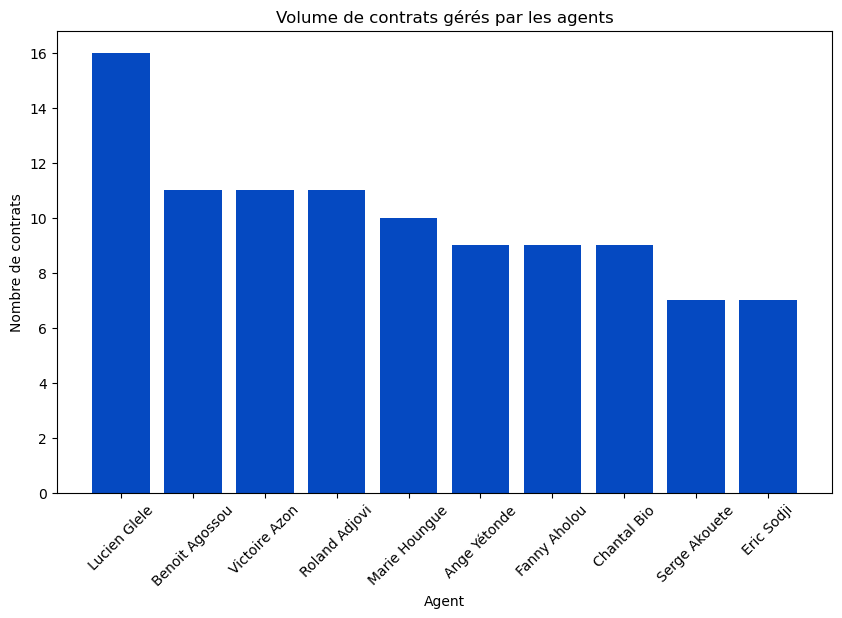

In [9]:
#Évaluation des agents commerciaux basée sur le volume de contrats qu'ils ont gérés
frequence_agents = df['Agent SBIN(Responsable contrat)'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(frequence_agents.index, frequence_agents.values, color='#0549c1')
plt.xlabel('Agent')
plt.ylabel('Nombre de contrats')
plt.title('Volume de contrats gérés par les agents')
plt.xticks(rotation=45)
plt.show()

In [10]:
#contrats les plus sollicités par les clients
def contrats_sollicités(type_de_clients):
    data = df[df['Type de client'] == type_de_clients]
    frequence_offre = data['Offres'].value_counts()
    plt.figure(figsize=(10,6))
    plt.bar(frequence_offre.index, frequence_offre.values, color="lightgreen", edgecolor='black')
    plt.xlabel("Types d'offres")
    plt.ylabel('Nombre de contrats')
    plt.title('Contrats les plus sollicités par les clients')
    plt.show()

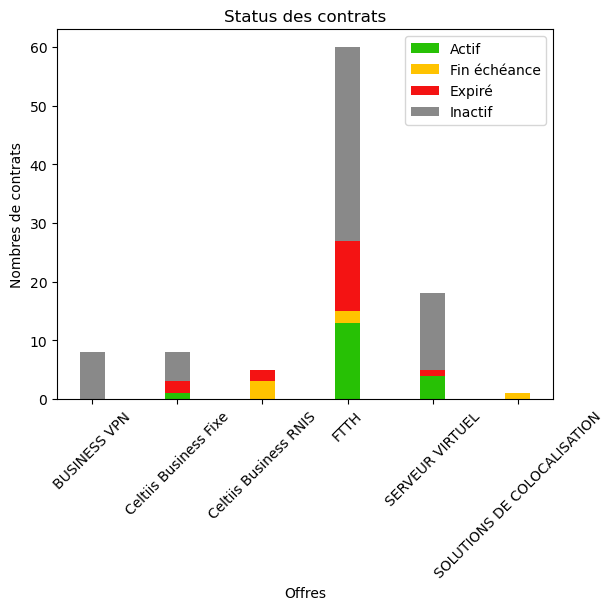

In [11]:
#status des contrats en fonctions offres

etat = df.groupby(['Status', 'Offres']).size().unstack(fill_value=0)

offres = list(etat.columns)
#extraction du nombre d'occurence de chaque status pour chaque offres dans des listes
Actif = list(etat.loc['ACTIF'].values)
Fin_echeance = list(etat.loc["FIN D'ECHEANCE"].values)
Inactif = list(etat.loc['INACTIF'].values)
Expire = list(etat.loc['EXPIRE'].values)

#caractéristique des barres
bar_width = 0.3
index = np.arange(len(offres))

plt.bar(index, Actif, color='#27c105', width=bar_width, label='Actif')
plt.bar(index, Fin_echeance, bottom=Actif, color='#FFC300', width=bar_width, label='Fin échéance')
plt.bar(index, Expire, bottom=np.array(Actif) + np.array(Fin_echeance), color='#f41313', width=bar_width, label='Expiré')
plt.bar(index, Inactif, bottom=np.array(Actif) + np.array(Fin_echeance) + np.array(Expire), color='#898989', width=bar_width, label='Inactif')
plt.xlabel('Offres')
plt.ylabel('Nombres de contrats')
plt.title('Status des contrats')
plt.xticks(index, offres, rotation=45)
plt.legend()
plt.show()

In [12]:
def tri_par_mois_annee(mois, annee):
    # Conversion des mois en format numérique
    mois_numerique = {
        "Janvier": 1, "Février": 2, "Mars": 3, "Avril": 4,
        "Mai": 5, "Juin": 6, "Juillet": 7, "Août": 8, "Septembre": 9,
        "Octobre": 10, "Novembre": 11, "Décembre": 12
    }[mois]
    
    # Filtrage des contrats en cours pour le mois et l'année sélectionnés
    plage = df[(df['Date de fin'].dt.year <= annee) & (df['Date de fin'].dt.month <= mois_numerique)]
    
    # Affichage du résultat
    return plage


In [13]:
#mail
data_mail = pd.read_excel('C:/Users/MSI/Documents/My_doc/Stage/Projet_suivi_contrats/Essai_mail.xlsx')
#conversion de la colonne date de début en datetime pour pouvoir extraire l'annee et le mois
data_mail['Date de fin'] = pd.to_datetime(data_mail['Date de fin'])
data_mail['Annee de fin'] = data_mail['Date de fin'].dt.year
data_mail['Moi de fin'] = data_mail['Date de fin'].dt.month
current_month = datetime.now().month
current_year = datetime.now().year

#trie des contrats venant à terme
contrats_exp = data_mail[(data_mail['Date de fin'].dt.year <= current_year) & (data_mail['Date de fin'].dt.month <= current_month) & ((data_mail['Date de fin'].dt.month) >= current_month-2)]

def notification(plage):
    email = "barondegbey2004@gmail.com"
    
    nom_mail = data_mail.groupby(['Nom', 'Date de fin', 'Offres', 'Adresse']).size().reset_index(name='count')
    adresse_trier = nom_mail[['Nom', 'Adresse', 'Date de fin', 'Offres']].drop_duplicates()
    
    for mail in adresse_trier['Adresse'].unique():
        df_adresse = adresse_trier[adresse_trier['Adresse'] == mail]
        
        for index, ligne in df_adresse.iterrows():          
            text = f"Bonjour {ligne['Nom']}\n\nVotre abonnement à l'offre {ligne['Offres']} expire le {ligne['Date de fin']}\n\nCordialement"
            
            msg = MIMEText(text, 'plain', 'utf-8')
            msg['Subject'] = "Notification d'expiration d'abonnement"
            msg['From'] = email
            msg['To'] = mail

            server = s.SMTP("smtp.gmail.com", 587)
            server.starttls()

            password = "etub jtkw vqvi pugy"
            if not password:
                raise ValueError("Le mot de passe de l'application Gmail n'est pas défini. Veuillez vérifier la variable d'environnement GMAIL_APP_PASSWORD.")


            server.login(email, password)
            server.sendmail(email, mail, msg.as_string())
            print(f"email has been sent to {mail}")
            server.quit()

C:\Users\MSI\AppData\Local\Temp\ipykernel_8196\2248033002.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_mail['Date de fin'] = pd.to_datetime(data_mail['Date de fin'])


Annee,Departement,2023,2024,2025,2026,2027
0,Atlantique,6,2,0,2,0
1,Borgou,5,1,3,4,0
2,Collines,0,4,5,1,1
3,Donga,3,5,1,1,0
4,Kouffo,1,2,5,3,0
5,Littoral,3,3,1,4,0
6,Mono,3,2,4,2,0
7,Ouémé,2,2,2,5,0
8,Plateau,1,1,2,2,0
9,Zou,1,2,2,0,1
